In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df_train = pd.read_csv(r"C:\New_Folder\GA\Projects\Kaggle\Used car price\train-data.csv")
df_test =  pd.read_csv(r"C:\New_Folder\GA\Projects\Kaggle\Used car price\test-data.csv")

In [3]:
df_train.shape

(6019, 14)

In [4]:
df_test.shape

(1234, 13)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
df_train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
df_train.head(20)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


## Dropped Unnamed column

In [8]:
df_train.drop(['Unnamed: 0'], axis=1, inplace=True)
df_test.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [9]:
df_train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [10]:
df_train['Name'].value_counts()

Mahindra XUV500 W8 2WD         49
Maruti Swift VDI               45
Honda City 1.5 S MT            34
Maruti Swift Dzire VDI         34
Maruti Swift VDI BSIV          31
                               ..
BMW 5 Series 2003-2012 530d     1
Maruti Swift RS VDI             1
Tata Nano STD SE                1
Toyota Prius 2009-2016 Z4       1
Honda CR-V 2.4L 4WD MT          1
Name: Name, Length: 1876, dtype: int64

In [11]:
df_train['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [12]:
df_train['Mileage'].value_counts()
#df_train['Power'].value_counts()
#df_train['Engine'].value_counts()
#df_train['Fuel_Type'].value_counts()
#df_train['Transmission'].value_counts()
#df_train['Owner_Type'].value_counts()

17.0 kmpl     172
18.9 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
13.44 kmpl      1
8.0 kmpl        1
25.01 kmpl      1
19.91 kmpl      1
13.29 kmpl      1
Name: Mileage, Length: 442, dtype: int64

In [13]:
df_train['Year'].value_counts()

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

In [14]:
miss_percent = (df_train.isnull().sum() / len(df_train)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df_train.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
New_Price,86.310018,5195
Seats,0.697790,42
Engine,0.598106,36
Power,0.598106,36
Mileage,0.033228,2


## Missing value percentage in train

In [15]:
for column in df_train.columns:
    if df_train[column].isnull().sum() > 0:
        print ("Percentage of missing values in {} is: {}".format(column, (df_train[column].isnull().sum()/len(df_train))*100))

Percentage of missing values in Mileage is: 0.033228110981890685
Percentage of missing values in Engine is: 0.5981059976740323
Percentage of missing values in Power is: 0.5981059976740323
Percentage of missing values in Seats is: 0.6977903306197043
Percentage of missing values in New_Price is: 86.31001827546105


## Count of Missing value in train

In [16]:
for column in df_train:
    if df_train[column].isnull().sum()>0:
        print ("Count of missing value in {} is {} out of 6019".format(column, (df_train[column].isnull().sum())))

Count of missing value in Mileage is 2 out of 6019
Count of missing value in Engine is 36 out of 6019
Count of missing value in Power is 36 out of 6019
Count of missing value in Seats is 42 out of 6019
Count of missing value in New_Price is 5195 out of 6019


## Missing value percentage in test

In [17]:
for column in df_test.columns:
    if df_test[column].isnull().sum()>0:
        print ("Percentage of missing values in {} is: {}".format(column, (df_test[column].isnull().sum()/len(df_test))*100))

Percentage of missing values in Engine is: 0.8103727714748784
Percentage of missing values in Power is: 0.8103727714748784
Percentage of missing values in Seats is: 0.8914100486223663
Percentage of missing values in New_Price is: 85.25121555915722


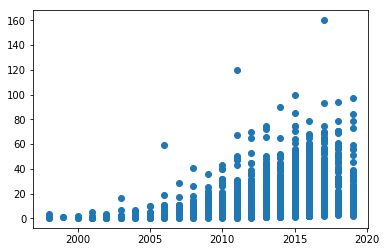

In [18]:
plt.scatter(df_train['Year'], df_train['Price'])

In [19]:
miss_percent = (df_train.isnull().sum() / len(df_train)) * 100
missing = pd.DataFrame({"percent":miss_percent, 'count':df_train.isnull().sum()}).sort_values(by="percent", ascending=False)
missing.loc[missing['percent'] > 0]

,percent,count
New_Price,86.310018,5195
Seats,0.697790,42
Engine,0.598106,36
Power,0.598106,36
Mileage,0.033228,2


## Creating new brand name column

In [20]:
df_train['brand_name'] = df_train['Name'].apply(lambda x:str(x).split(" ")[0])
df_test['brand_name'] = df_test['Name'].apply(lambda x:str(x).split(" ")[0])

In [21]:
df_train.drop(['Name'], axis = 1, inplace=True)
df_test.drop(['Name'], axis = 1, inplace=True) 

In [22]:
df_train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,brand_name
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,Maruti


## Removing units of Mileage, Engine and Power

In [23]:
df_train['Mileage_upd'] = df_train['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
df_train['Engine_upd'] = df_train['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_train['Power_upd'] = df_train['Power'].apply (lambda x: re.sub(r'(\d+\.?\d+?)\s(\w+)',r'\1',str(x)))

In [24]:
df_test['Mileage_upd'] = df_test['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
df_test['Engine_upd'] = df_test['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_test['Power_upd'] = df_test['Power'].apply (lambda x: re.sub(r'(\d+\.?\d+?)\s(\w+)',r'\1',str(x)))

## Converted new columns of Mileage, Engine and Power to numberic and dropped old columns

In [25]:
df_train['Mileage_upd'] = df_train['Mileage_upd'].apply(pd.to_numeric,errors = 'coerce')
df_train['Engine_upd'] = df_train['Engine_upd'].apply(pd.to_numeric,errors = 'coerce')
df_train['Power_upd'] = df_train['Power_upd'].apply(pd.to_numeric,errors = 'coerce')
df_train.drop (['Mileage'], axis = 1, inplace = True)
df_train.drop (['Power'], axis = 1, inplace = True)
df_train.drop (['Engine'], axis = 1, inplace = True)

In [26]:
df_test['Mileage_upd'] = df_test['Mileage_upd'].apply(pd.to_numeric,errors = 'coerce')
df_test['Engine_upd'] = df_test['Engine_upd'].apply(pd.to_numeric,errors = 'coerce')
df_test['Power_upd'] = df_test['Power_upd'].apply(pd.to_numeric,errors = 'coerce')
df_test.drop (['Mileage'], axis = 1, inplace = True)
df_test.drop (['Power'], axis = 1, inplace = True)
df_test.drop (['Engine'], axis = 1, inplace = True)

## To update Mileage column which has 0 to mode of that specific brand

In [27]:
zero_mileage_col = df_train.loc[df_train['Mileage_upd'] == 0.0]['brand_name'].unique()

In [28]:
for x in zero_mileage_col:
    fill_zero = df_train[df_train['brand_name'] == x] ['Mileage_upd'].mode()[0]
    x1 = ((df_train['brand_name'] == x) & (df_train['Mileage_upd'] == 0.0))
    df_train.loc[x1, 'Mileage_upd'] = fill_zero

In [29]:
zero_mileage_col2 = df_test[df_test['Mileage_upd']==0.0]['brand_name'].unique()

In [30]:
for y in zero_mileage_col2:
    fill_zero = df_test[df_test['brand_name']==y]['Mileage_upd'].mode()[0]
    y1 = ((df_test['brand_name']==y) & (df_test['Mileage_upd']==0.0))
    df_test.loc[y1, 'Mileage_upd'] = fill_zero

In [31]:
for column in df_train:
    if df_train[column].isnull().sum()>0:
        print ("Count of missing value in {} is {} out of 6019".format(column, (df_train[column].isnull().sum())))

Count of missing value in Seats is 42 out of 6019
Count of missing value in New_Price is 5195 out of 6019
Count of missing value in Mileage_upd is 2 out of 6019
Count of missing value in Engine_upd is 36 out of 6019
Count of missing value in Power_upd is 143 out of 6019


## To fill missing values in Seats coolumn

In [32]:
def fill_na_with_mode (ds, brandname):
    fill_value = ds.loc[ds['brand_name']==brandname]['Seats'].mode()[0]
    condit = ((ds['brand_name']== brandname) & (ds['Seats'].isnull()))
    ds.loc[condit,'Seats'] = ds.loc[condit,'Seats'].fillna(fill_value)

In [33]:
car_brands = ['Maruti','Hyundai','BMW','Fiat','Land','Ford','Toyota','Honda','Skoda','Mahindra']

In [34]:
for c in car_brands:
    fill_na_with_mode(df_train, c)
    fill_na_with_mode(df_test, c)

## Updating random number 5 in one row for Seats column which had 0

In [35]:
m1 = (df_train['Seats'] == 0)
df_train.loc[m1, 'Seats'] = 5.0

## Drop one row each from Train and test for those brands which had Power as Null

In [36]:
df_train.drop(df_train[df_train['brand_name'] == 'Smart'].index, axis = 0, inplace = True)
df_test.drop(df_test[df_test['brand_name']== 'Hindustan'].index, axis =0, inplace = True)

## Function to replace na value with mode of that specific brand

In [37]:
def fill_na_with_mode_of_brand(ds, brandname, colname):
  fill_value = ds.loc[ds['brand_name'] == brandname][colname].mode()[0]
  condit = ((ds['brand_name'] == brandname) & (ds[colname].isnull()))
  ds.loc[condit, colname] = ds.loc[condit, colname].fillna(fill_value)

In [38]:
miss_Mileage_col = df_train.loc[df_train['Mileage_upd'].isnull()]['brand_name'].unique()
miss_Engine_col = df_train.loc[df_train['Engine_upd'].isnull()]['brand_name'].unique()
miss_Power_col = df_train.loc[df_train['Power_upd'].isnull()]['brand_name'].unique()

In [39]:
for a in miss_Mileage_col:
    fill_na_with_mode_of_brand(df_train, a, 'Mileage_upd')
for b in miss_Engine_col:
    fill_na_with_mode_of_brand(df_train, b, 'Engine_upd')
for c in miss_Power_col:
    fill_na_with_mode_of_brand(df_train, c, 'Power_upd')

## Analyzing and removing outlier from price column

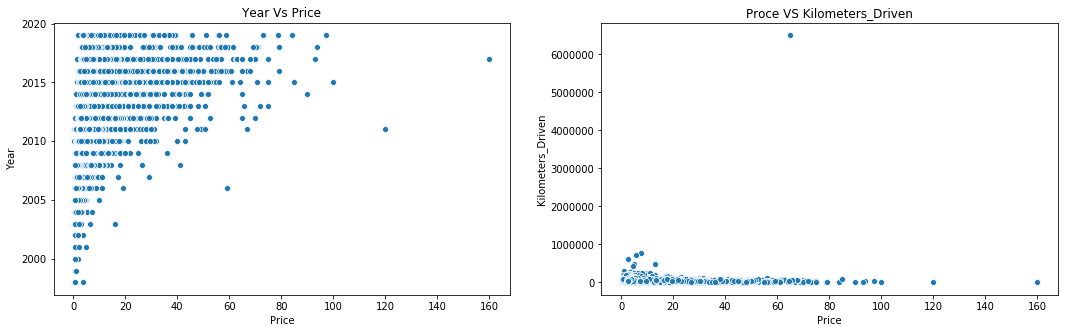

In [40]:
fig = plt.figure(figsize=(18,5))

ax1= fig.add_subplot(1,2,1)
sns.scatterplot(x='Price', y ='Year', data = df_train)
ax1.set_xlabel('Price')
ax1.set_ylabel('Year')
ax1.set_title('Year Vs Price')

ax2= fig.add_subplot(1,2,2)
sns.scatterplot(x='Price', y = 'Kilometers_Driven', data = df_train)
ax2.set_xlabel('Price')
ax2.set_ylabel('Kilometers_Driven')
ax2.set_title('Proce VS Kilometers_Driven')

plt.show()

In [41]:
df_train[df_train['Price'] > 140]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,brand_name,Mileage_upd,Engine_upd,Power_upd
4079,Hyderabad,2017,25000,Diesel,Automatic,First,5.0,2.3 Cr,160.0,Land,13.33,2993.0,255.0


In [42]:
df_train[df_train['Kilometers_Driven'] > 6200000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,brand_name,Mileage_upd,Engine_upd,Power_upd
2328,Chennai,2017,6500000,Diesel,Automatic,First,5.0,NaN,65.0,BMW,15.97,2993.0,258.0


In [43]:
df_train.drop(df_train[df_train['Kilometers_Driven'] > 6200000].index, axis = 0, inplace = True)

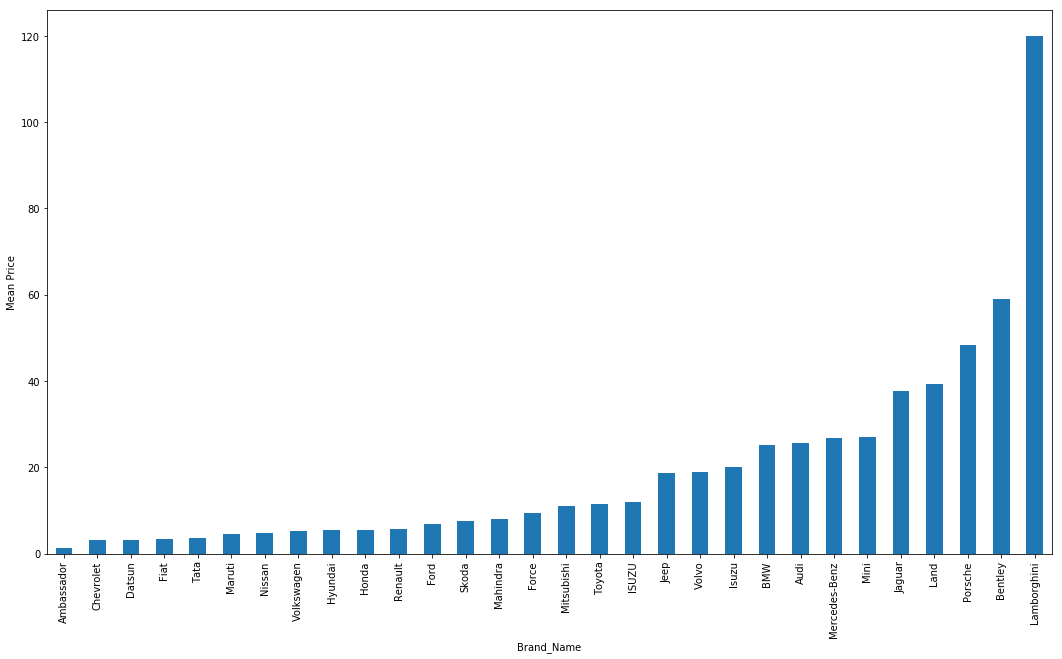

In [44]:
fig = plt.figure(figsize=(18,10))
df_train.groupby('brand_name')['Price'].mean().sort_values().plot.bar()
plt.xlabel('Brand_Name',)
plt.ylabel('Mean Price')
plt.show()

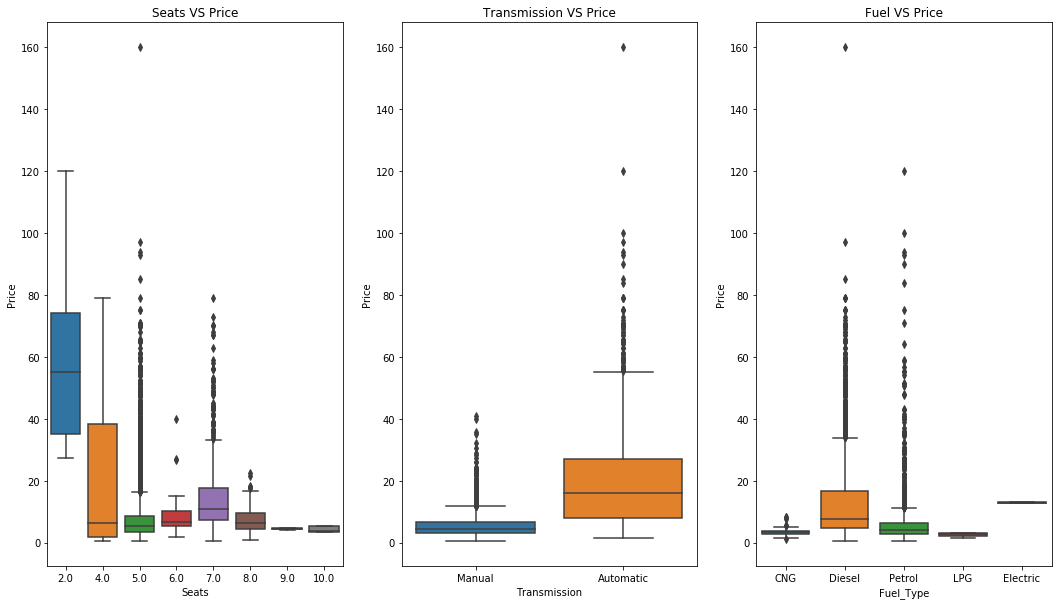

In [45]:
fig = plt.figure(figsize = (18,10))

ax1 = fig.add_subplot(1,3,1)
sns.boxplot(x='Seats', y = 'Price', data = df_train)
ax1.set_title  ("Seats VS Price")


ax2 = fig.add_subplot(1,3,2)
sns.boxplot(x= 'Transmission', y = 'Price', data = df_train)
ax2.set_title("Transmission VS Price")

ax3 = fig.add_subplot (1,3,3)
sns.boxplot(x= 'Fuel_Type', y = 'Price', data = df_train)
ax3.set_title ("Fuel VS Price")

plt.show()

## Create new column which has difference of years from current to Year column and is of type int

In [46]:
import datetime
now = datetime.datetime.now()
df_train['Year_upd'] = df_train['Year'].apply(lambda x : now.year - x)
df_test['Year_upd'] = df_test['Year'].apply(lambda x : now.year - x)

## Dropped Location, Year and New_Price column from Train and Test dataset 

In [47]:
df_train.drop('Location', axis=1, inplace = True)
df_train.drop('Year', axis=1, inplace = True)
df_train.drop('New_Price', axis=1, inplace = True)
df_test.drop('Location', axis=1, inplace = True)
df_test.drop('Year', axis=1, inplace = True)
df_test.drop('New_Price', axis=1, inplace = True)

In [48]:
df_train_norm = pd.get_dummies(df_train, drop_first = True)
df_test_norm = pd.get_dummies(df_test, drop_first = True)

In [49]:
df_train_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6017 entries, 0 to 6018
Data columns (total 44 columns):
Kilometers_Driven            6017 non-null int64
Seats                        6017 non-null float64
Price                        6017 non-null float64
Mileage_upd                  6017 non-null float64
Engine_upd                   6017 non-null float64
Power_upd                    6017 non-null float64
Year_upd                     6017 non-null int64
Fuel_Type_Diesel             6017 non-null uint8
Fuel_Type_Electric           6017 non-null uint8
Fuel_Type_LPG                6017 non-null uint8
Fuel_Type_Petrol             6017 non-null uint8
Transmission_Manual          6017 non-null uint8
Owner_Type_Fourth & Above    6017 non-null uint8
Owner_Type_Second            6017 non-null uint8
Owner_Type_Third             6017 non-null uint8
brand_name_Audi              6017 non-null uint8
brand_name_BMW               6017 non-null uint8
brand_name_Bentley           6017 non-null uint8
b

## Check and log transformed target column Price, because it was skewed towards left

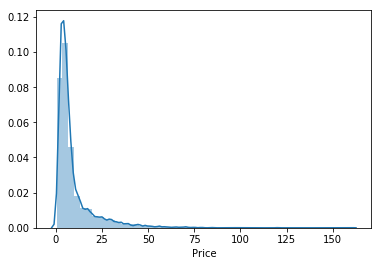

In [50]:
sns.distplot(df_train_norm['Price'])

In [51]:
df_train_norm['Price_upd'] = np.log1p(df_train_norm['Price'].values)

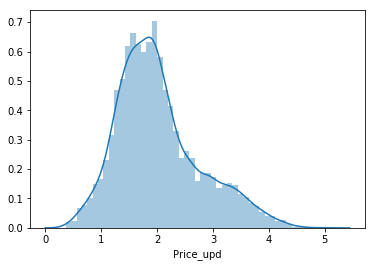

In [52]:
sns.distplot(df_train_norm['Price_upd'])

In [53]:
df_train_norm.drop(columns=['Price'], axis=1, inplace=True)

In [54]:
df_train_X = df_train_norm.drop(columns=['Price_upd'], axis=1)
df_train_y = df_train_norm[['Price_upd']]

## Normalized train and test dataset

In [55]:
df_train_X = (df_train_X - df_train_X.mean())/df_train_X.std()
df_test_norm = (df_test_norm - df_test_norm.mean())/df_test_norm.std()

## Model building

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_train_X, df_train_y, test_size = 0.22, random_state = 1)

reg  = lm.fit(X_train, y_train)

In [57]:
y_predict = reg.predict(X_test)
y_predict

array([[1.26552093],
       [1.60052778],
       [0.93832768],
       ...,
       [1.74871724],
       [2.08694159],
       [3.47966153]])

## Score Calculations

In [58]:
from sklearn.metrics import r2_score
score = r2_score(y_predict, y_test)
score

0.90559821108742